In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras import models, layers
import keras

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1) 

In [3]:
# http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
model = Sequential()
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"]) 

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
history = model.fit(x=x_train,y=y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test), verbose=1) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.8874 - acc: 0.7867 - val_loss: 0.4358 - val_acc: 0.8843
Epoch 2/10
60000/60000 [==============================] - 179s 3ms/step - loss: 0.3936 - acc: 0.8908 - val_loss: 0.3334 - val_acc: 0.9057
Epoch 3/10
60000/60000 [==============================] - 185s 3ms/step - loss: 0.3260 - acc: 0.9066 - val_loss: 0.2916 - val_acc: 0.9178
Epoch 4/10
60000/60000 [==============================] - 305s 5ms/step - loss: 0.2887 - acc: 0.9171 - val_loss: 0.2630 - val_acc: 0.9272
Epoch 5/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.2625 - acc: 0.9246 - val_loss: 0.2391 - val_acc: 0.9313
Epoch 6/10
60000/60000 [==============================] - 513s 9ms/step - loss: 0.2418 - acc: 0.9301 - val_loss: 0.2216 - val_acc: 0.9369
Epoch 7/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2247 - acc: 0.9352 - val_loss: 0.2073 - 

dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])
[0.78675, 0.8907500000317892, 0.9065666666666666, 0.9170833333015442, 0.9246333333651224, 0.9301333333333334, 0.9352166666348776, 0.9391666666666667, 0.9429, 0.9466166666348775]


<IPython.core.display.Javascript object>


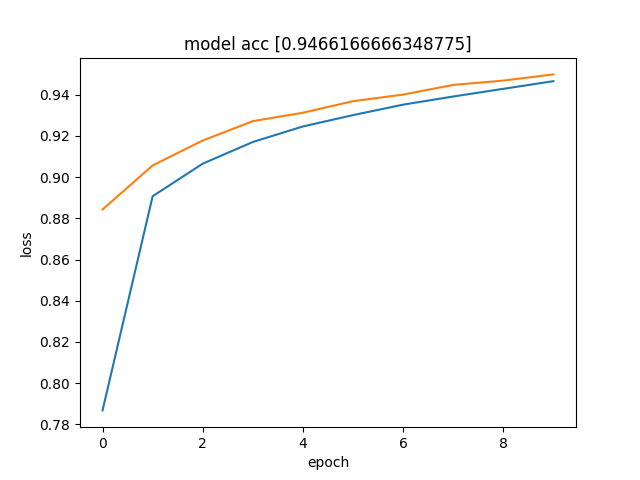

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
print(history.history.keys())
print(history.history['acc'])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc [{}]'.format(history.history['acc'][-1]))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [7]:
score = model.evaluate(x_test, y_test)
print("accuracy {:.2f}%".format(score[1] * 100))

10000/10000 [==============================] - 29s 3ms/step
accuracy 94.99%
